In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\73943457.py:24: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\73943457.py:24: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\73943457.py:24: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\73943457.py:24: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Te

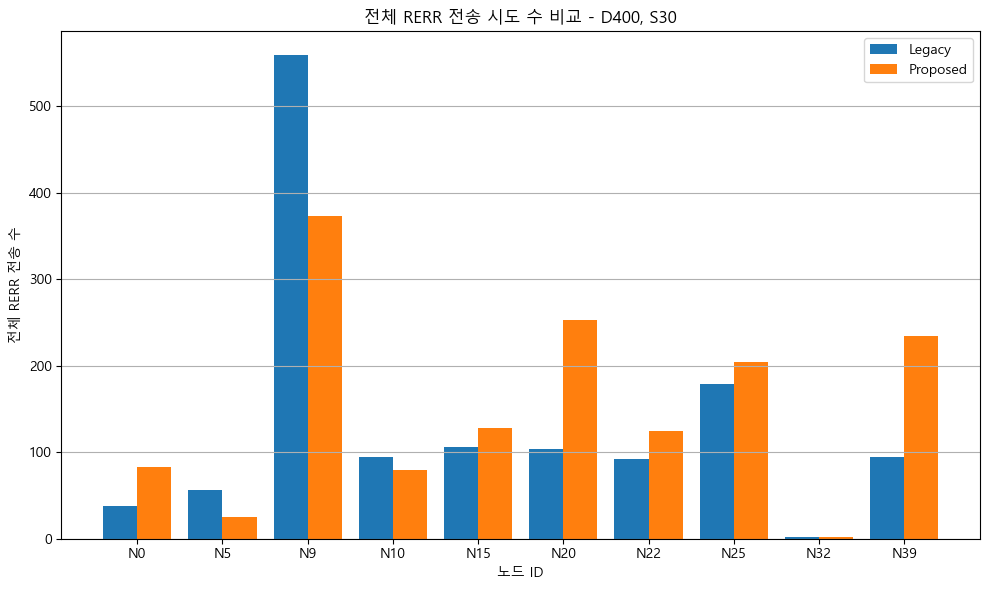

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rerr_total = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rerr_total[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rerr", na=False)].copy()
        df['Time'] = df['Time'].astype(float).round(6)
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'].astype(str) + "_" + df['sender'].astype(str)

        total_rerr = df['group'].nunique()
        results_rerr_total[method].append(total_rerr)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rerr_total['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rerr_total['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("전체 RERR 전송 수")
plt.xlabel("노드 ID")
plt.title(f"전체 RERR 전송 시도 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\2831979748.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\2831979748.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\2831979748.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\2831979748.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

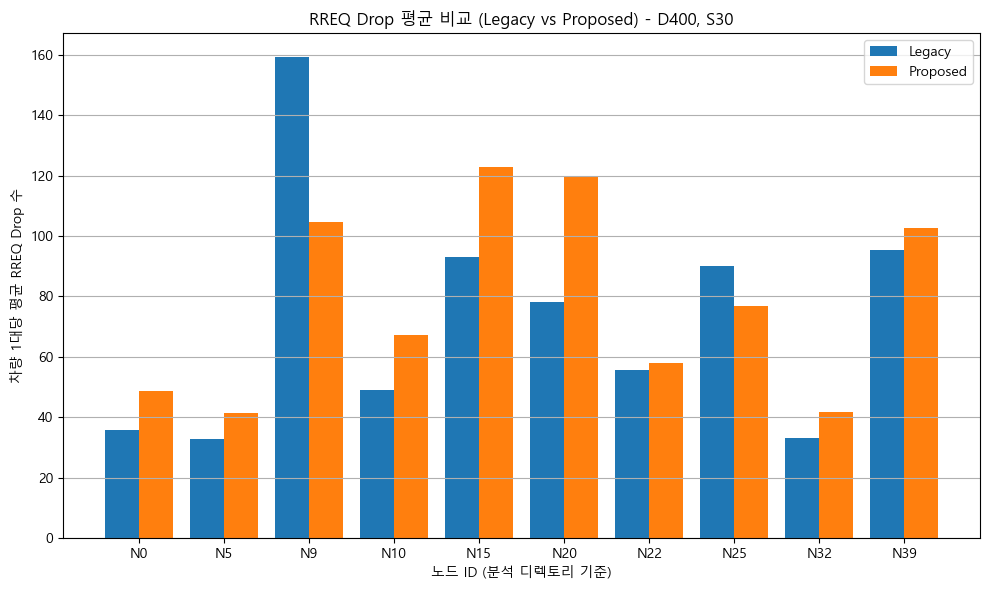

In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()

        df['Success'] = df['Success'].astype(str)
        senders = df['sender'].unique()
        drops = df[df['Success'] == "False"]
        avg_drop = len(drops) / len(senders) if len(senders) > 0 else 0
        results[method].append(avg_drop)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("차량 1대당 평균 RREQ Drop 수")
plt.xlabel("노드 ID (분석 디렉토리 기준)")
plt.title(f"RREQ Drop 평균 비교 (Legacy vs Proposed) - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


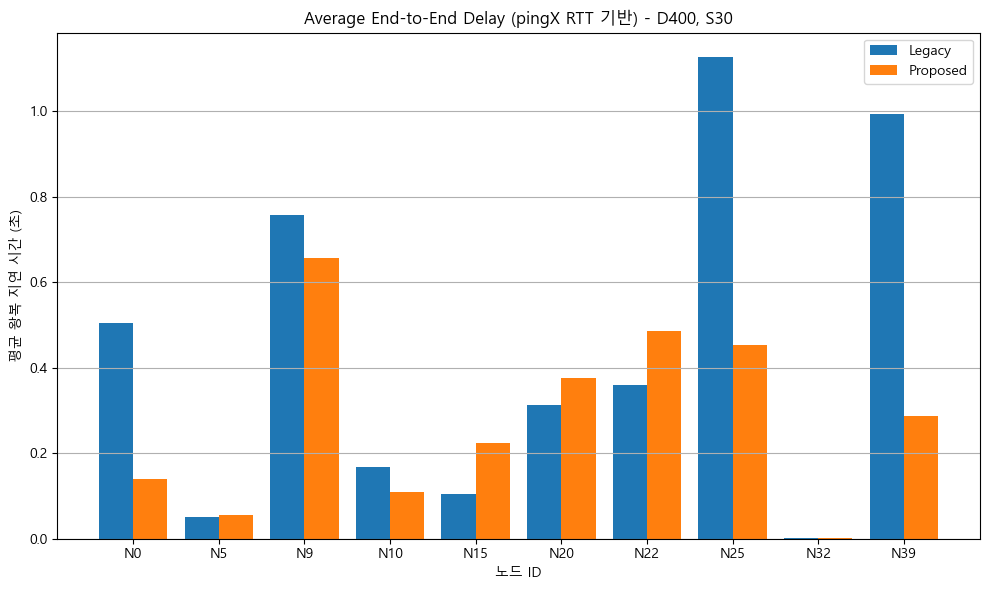

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False 

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
methods = ["L", "P"]
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path, header=0)
        df.columns = df.columns.str.strip()

        if 'Packet' not in df.columns or 'Sender' not in df.columns or 'Receiver' not in df.columns or 'Time' not in df.columns or 'Success' not in df.columns:
            results[method].append(0)
            continue

        df['Packet'] = df['Packet'].astype(str)
        df['Success'] = df['Success'].astype(str).str.lower() == 'true'
        df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
        df = df.dropna(subset=['Time'])

        ping_tx = df[df['Packet'].str.match(r'ping\d+$')]
        ping_rx = df[df['Packet'].str.match(r'ping\d+-reply$') & df['Success']]

        ping_tx = ping_tx.copy()
        ping_rx = ping_rx.copy()
        ping_tx['PktName'] = ping_tx['Packet']
        ping_rx['PktName'] = ping_rx['Packet'].str.replace("-reply", "", regex=False)

        tx_dict = ping_tx.set_index('PktName')['Time'].to_dict()
        rx_dict = ping_rx.set_index('PktName')['Time'].to_dict()

        delays = []
        for pkt in set(tx_dict.keys()) & set(rx_dict.keys()):
            delays.append(rx_dict[pkt] - tx_dict[pkt])

        avg_delay = sum(delays) / len(delays) if delays else 0
        results[method].append(avg_delay)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("평균 왕복 지연 시간 (초)")
plt.xlabel("노드 ID")
plt.title(f"Average End-to-End Delay (pingX RTT 기반) - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\2831979748.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\2831979748.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\2831979748.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\2831979748.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

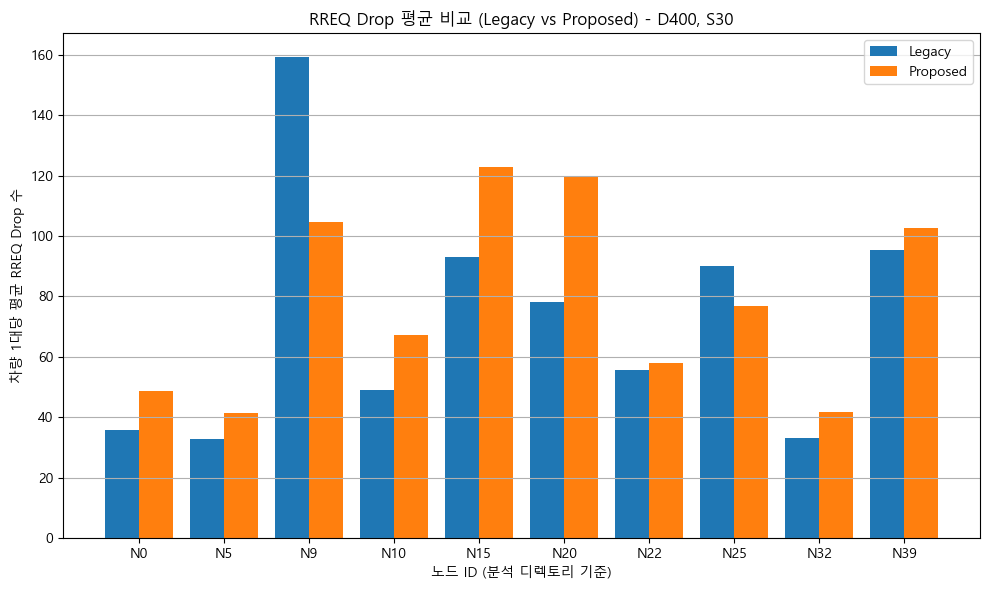

In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()

        df['Success'] = df['Success'].astype(str)
        senders = df['sender'].unique()
        drops = df[df['Success'] == "False"]
        avg_drop = len(drops) / len(senders) if len(senders) > 0 else 0
        results[method].append(avg_drop)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("차량 1대당 평균 RREQ Drop 수")
plt.xlabel("노드 ID (분석 디렉토리 기준)")
plt.title(f"RREQ Drop 평균 비교 (Legacy vs Proposed) - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


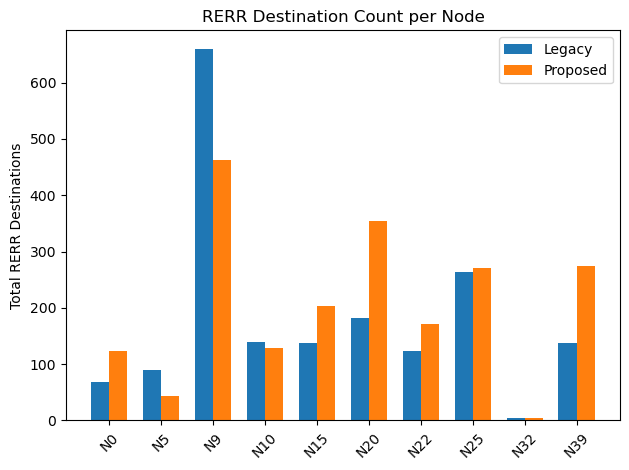

In [ ]:
import os
import re
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
methods = ["L", "P"] 

def count_rerr_destinations(base_path, method, density, speed, nodes):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "rerr_debug.txt")
        total = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    if "목적지 수" in line:
                        m = re.search(r'목적지 수:\s*(\d+)', line)
                        if m:
                            total += int(m.group(1))
        result[node] = total
    return result

legacy_result = count_rerr_destinations(base_path, "L", density, speed, nodes)
proposed_result = count_rerr_destinations(base_path, "P", density, speed, nodes)

x = range(len(nodes))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], [legacy_result[n] for n in nodes], width=width, label='Legacy')
ax.bar([i + width/2 for i in x], [proposed_result[n] for n in nodes], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels(nodes, rotation=45)
ax.set_ylabel('Total RERR Destinations')
ax.set_title('RERR Destination Count per Node')
ax.legend()
plt.tight_layout()
plt.show()


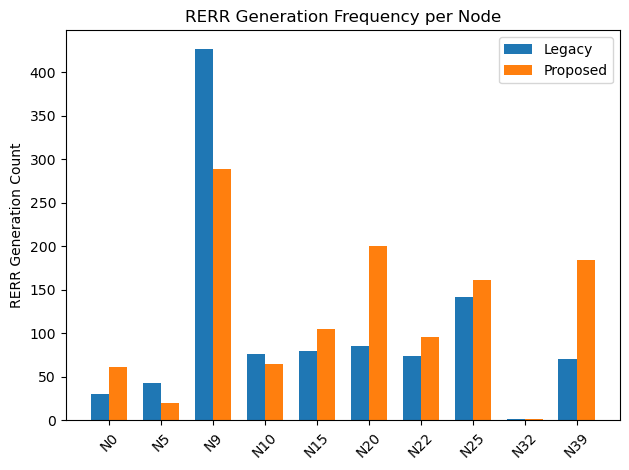

In [7]:
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
methods = ["L", "P"]

def count_rerr_frequency(base_path, method, density, speed, nodes):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "rerr_debug.txt")
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    if "[RERR 생성]" in line:
                        count += 1
        result[node] = count
    return result

legacy_result = count_rerr_frequency(base_path, "L", density, speed, nodes)
proposed_result = count_rerr_frequency(base_path, "P", density, speed, nodes)

x = range(len(nodes))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], [legacy_result[n] for n in nodes], width=width, label='Legacy')
ax.bar([i + width/2 for i in x], [proposed_result[n] for n in nodes], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels(nodes, rotation=45)
ax.set_ylabel('RERR Generation Count')
ax.set_title('RERR Generation Frequency per Node')
ax.legend()
plt.tight_layout()
plt.show()


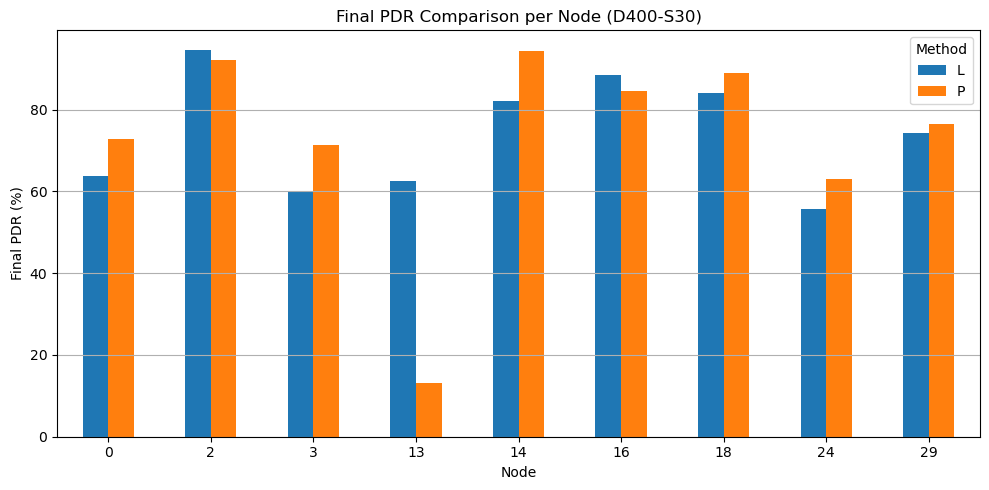

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

def extract_final_pdr(pdr_file_path):
    if os.path.isfile(pdr_file_path):
        with open(pdr_file_path, 'r') as f:
            lines = f.readlines()
            for line in reversed(lines):
                if ':' in line:
                    try:
                        _, val = line.strip().split(':')
                        return float(val.strip())
                    except:
                        continue
    return None

records = []
for node in nodes:
    for method in methods:
        path = os.path.join(base_path, method, density, speed, node, "PDR.txt")
        final_pdr = extract_final_pdr(path)
        records.append({"Node": int(node[1:]), "Method": method, "PDR": final_pdr})

df = pd.DataFrame(records)
df = df.sort_values("Node")
pivot_df = df.pivot(index="Node", columns="Method", values="PDR")

pivot_df.plot(kind="bar", figsize=(10, 5))
plt.ylabel("Final PDR (%)")
plt.title(f"Final PDR Comparison per Node ({density}-{speed})")
plt.grid(True, axis='y')
plt.xticks(rotation=0)
plt.legend(title="Method")
plt.tight_layout()
plt.show()


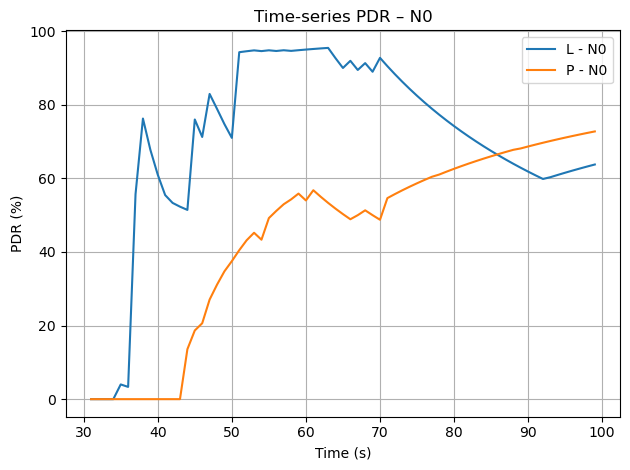

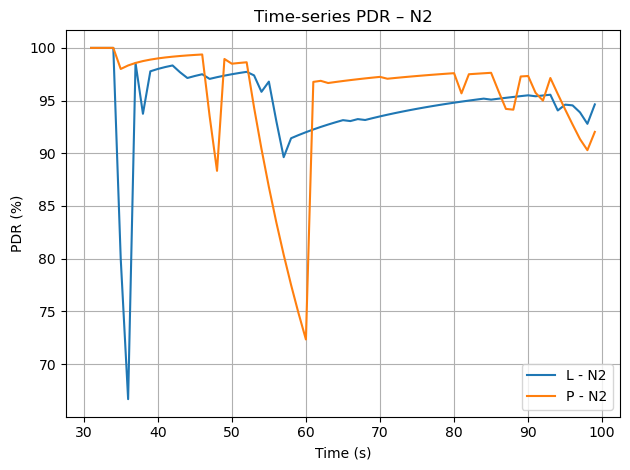

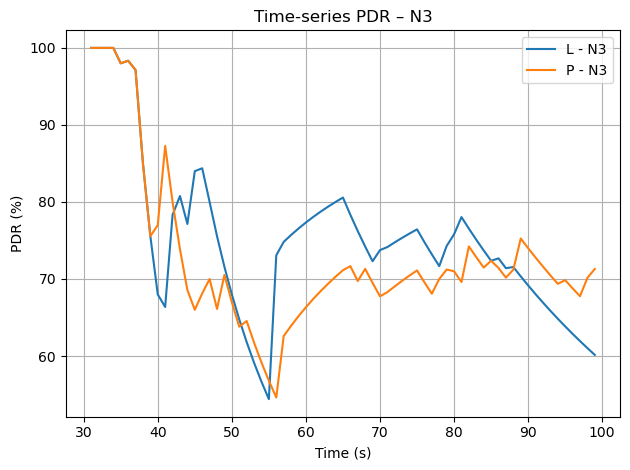

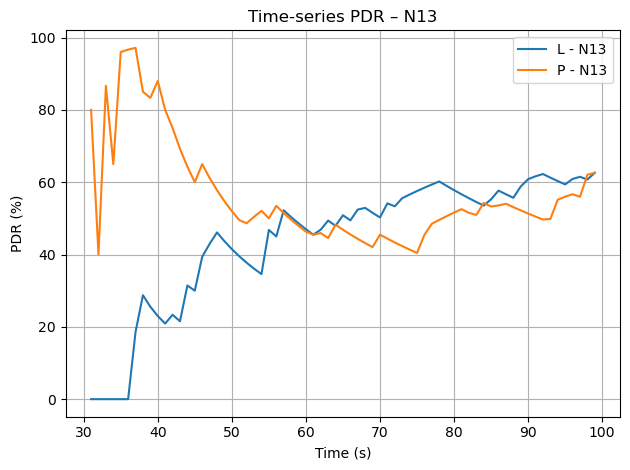

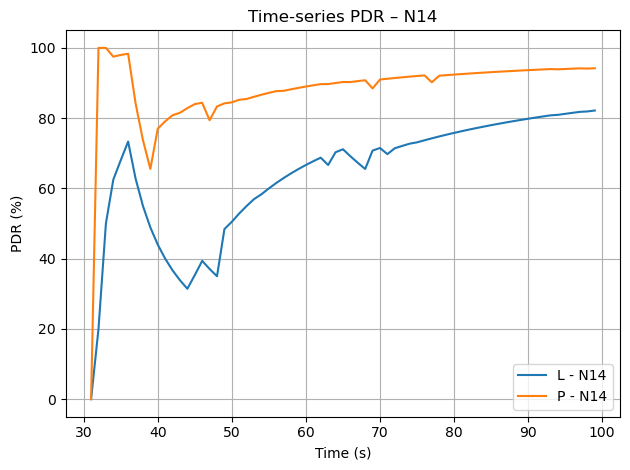

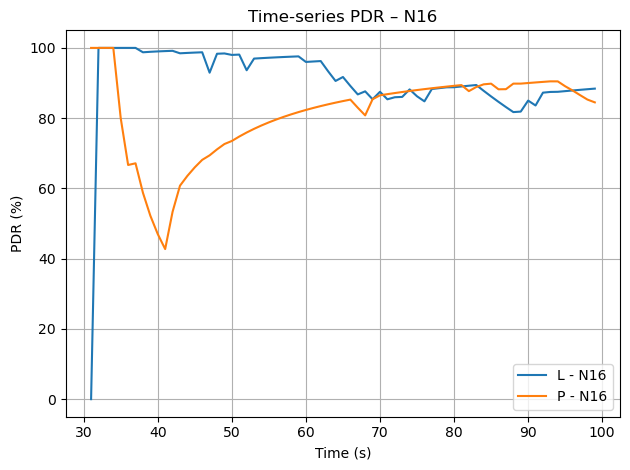

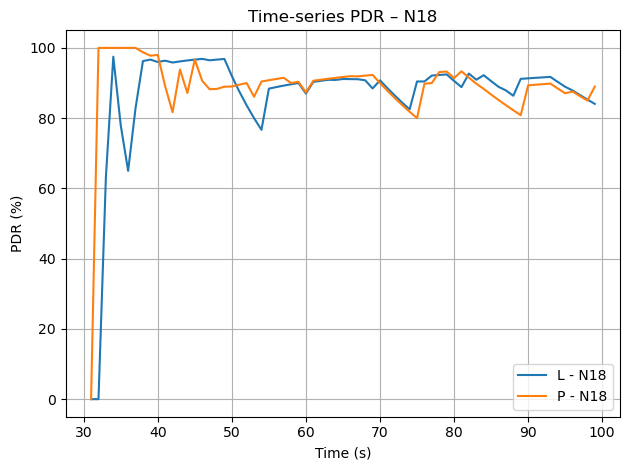

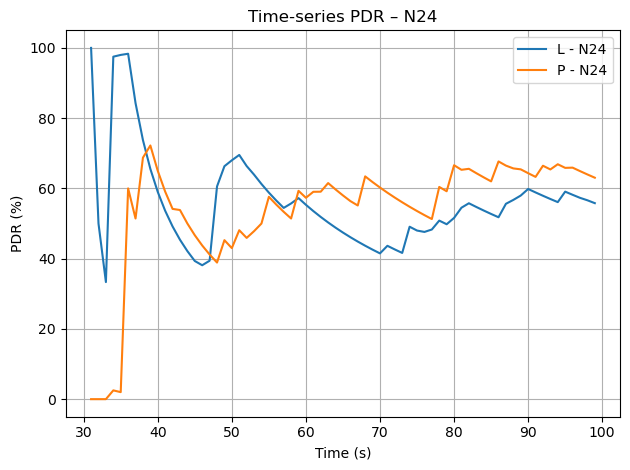

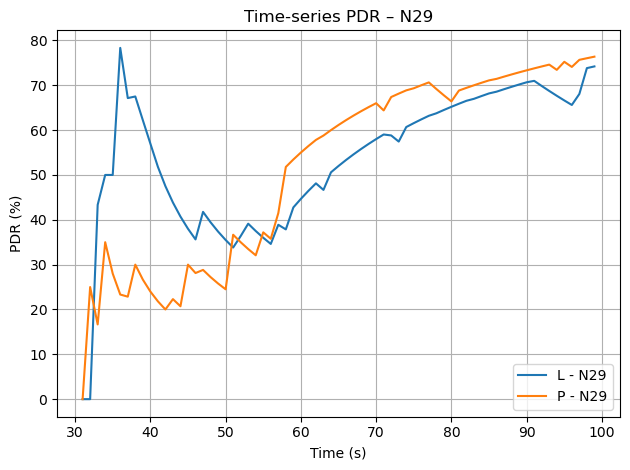

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

for node in nodes:
    plt.figure()
    for method in methods:
        file_path = os.path.join(base_path, method, density, speed, node, "PDR.txt")
        times = []
        pdr_values = []
        if os.path.isfile(file_path):
            with open(file_path, 'r') as f:
                for line in f:
                    if ':' in line:
                        try:
                            t, val = line.strip().split(':')
                            times.append(float(t.strip()))
                            pdr_values.append(float(val.strip()))
                        except:
                            continue
        plt.plot(times, pdr_values, label=f"{method} - {node}")

    plt.title(f"Time-series PDR – {node}")
    plt.xlabel("Time (s)")
    plt.ylabel("PDR (%)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.show()


In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]

def load_pdr(file_path):
    df = pd.read_csv(file_path, sep='\t', header=None, names=["Time", "PDR"])
    df = df.dropna()
    df["Time"] = df["Time"].astype(float)
    df["PDR"] = df["PDR"].astype(float)
    df = df[(df["Time"] >= 30) & (df["Time"] <= 100)]
    return df.reset_index(drop=True)

def find_crossover_time(df_legacy, df_proposed):
    merged = pd.merge(df_legacy, df_proposed, on="Time", suffixes=('_L', '_P'))
    for i in range(1, len(merged)):
        if merged.loc[i, "PDR_P"] > merged.loc[i, "PDR_L"] and merged.loc[i-1, "PDR_P"] <= merged.loc[i-1, "PDR_L"]:
            return merged.loc[i, "Time"]
    return None

results = {}

for node in nodes:
    file_L = os.path.join(base_path, "L", density, speed, node, "PDR.txt")
    file_P = os.path.join(base_path, "P", density, speed, node, "PDR.txt")

    if os.path.isfile(file_L) and os.path.isfile(file_P):
        df_L = load_pdr(file_L)
        df_P = load_pdr(file_P)
        crossover_time = find_crossover_time(df_L, df_P)
        results[node] = crossover_time

print("PDR에서 Proposed가 Legacy를 처음으로 앞서는 시점 (초):")
for node, t in results.items():
    print(f"{node}: {t if t is not None else '없음'}")


PDR에서 Proposed가 Legacy를 처음으로 앞서는 시점 (초):
N0: 없음
N2: 없음
N3: 없음
N13: 없음
N14: 없음
N16: 없음
N18: 없음
N24: 없음
N29: 없음


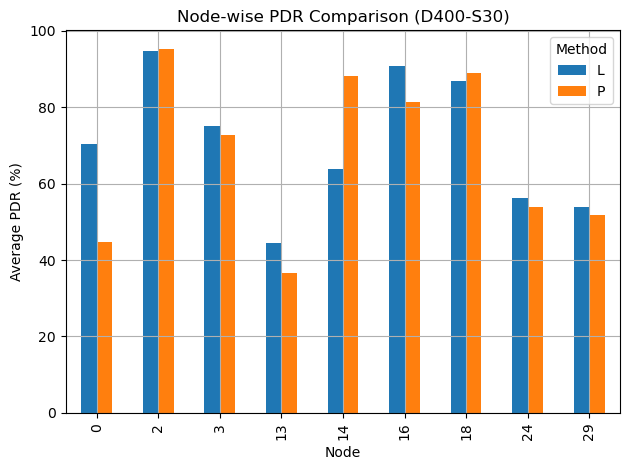

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

def extract_pdr_values(pdr_file_path):
    values = []
    with open(pdr_file_path, 'r') as f:
        for line in f:
            if ':' in line:
                try:
                    _, val = line.strip().split(':')
                    values.append(float(val.strip()))
                except:
                    continue
    return pd.Series(values).mean() if values else None

data = []

for node in nodes:
    for method in methods:
        path = os.path.join(base_path, method, density, speed, node, "PDR.txt")
        avg_pdr = extract_pdr_values(path)
        data.append({"Node": int(node[1:]), "Method": method, "PDR": avg_pdr})

df = pd.DataFrame(data)
df = df.sort_values("Node")

pivot_df = df.pivot(index="Node", columns="Method", values="PDR")
pivot_df.plot(kind="bar")
plt.ylabel("Average PDR (%)")
plt.title(f"Node-wise PDR Comparison ({density}-{speed})")
plt.grid(True)
plt.tight_layout()
plt.show()


C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N0/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N2/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N3/rreqCount.txt


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[


C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N13/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N14/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N16/rreqCount.txt


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[


C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N18/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N24/rreqCount.txt


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[


C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N29/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N0/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N2/rreqCount.txt


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[


C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N3/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N13/rreqCount.txt


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[


C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N14/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N16/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N18/rreqCount.txt


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[


C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N24/rreqCount.txt
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N29/rreqCount.txt


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\1082425511.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[


Legacy S10 RREQ Drop:
Node 0: 57.94%
Node 2: 68.61%
Node 3: 62.47%
Node 13: 57.40%
Node 14: 60.66%
Node 16: 62.34%
Node 18: 62.85%
Node 24: 61.04%
Node 29: 61.07%
Proposed S10 RREQ Drop:
Node 0: 51.89%
Node 2: 68.60%
Node 3: 57.93%
Node 13: 55.84%
Node 14: 62.66%
Node 16: 61.01%
Node 18: 66.08%
Node 24: 58.07%
Node 29: 58.84%


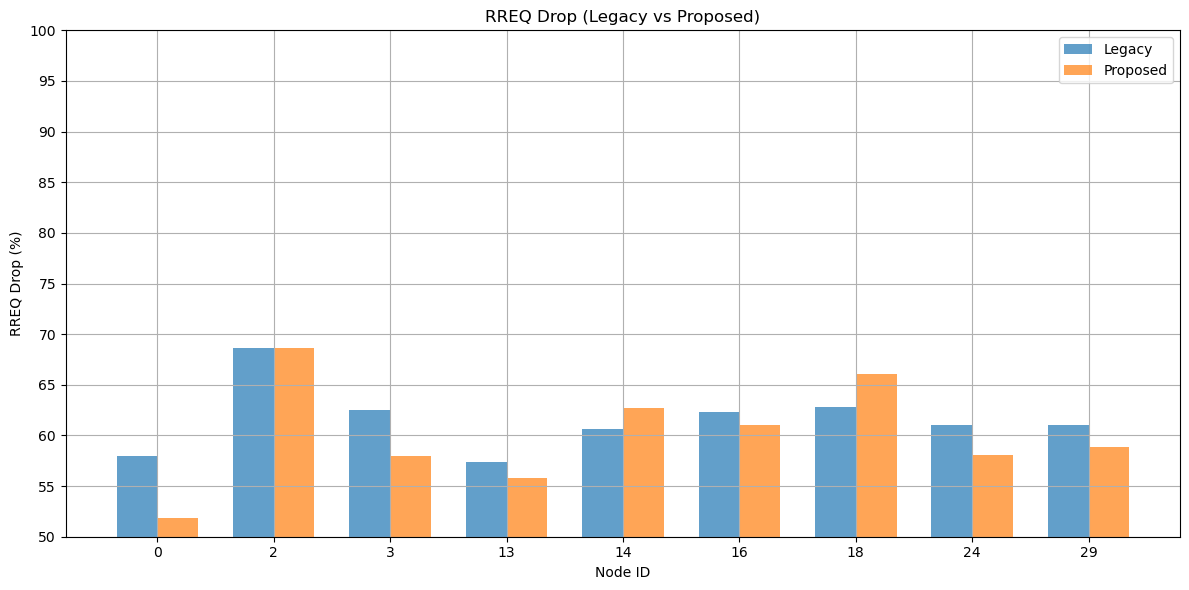

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 2, 3, 13, 14, 16, 18, 24, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N'

def compute_rreq_drop_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = base_path + str(node) + '/'
        rreq_file = node_path + 'rreqCount.txt'
        drop_file = node_path + 'sinr_drop_log.csv'

        rreq_total = 0
        rreq_drop = 0
        
        print(rreq_file)

        if os.path.isfile(rreq_file):
            with open(rreq_file, 'r') as f:
                rreq_total = len(f.readlines())

        if os.path.isfile(drop_file):
            df = pd.read_csv(drop_file, names=[
                'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z',
                'None', 'Nearby', 'Total'
            ])
            df.columns = df.columns.str.strip()
            rreq_drop = df['Packet'].str.contains('Rreq', case=False).sum()

        drop_ratio = (rreq_drop / rreq_total) * 100 if rreq_total > 0 else 0.0
        result[node] = drop_ratio

    return result

rreq_drop_proposed = compute_rreq_drop_ratio(base_path_proposed, h_node)
rreq_drop_legacy = compute_rreq_drop_ratio(base_path_legacy, h_node)

print("Legacy S10 RREQ Drop:")
for n in h_node:
    print(f"Node {n}: {rreq_drop_legacy[n]:.2f}%")

print("Proposed S10 RREQ Drop:")
for n in h_node:
    print(f"Node {n}: {rreq_drop_proposed[n]:.2f}%")

nodes = h_node
x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in nodes], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in nodes], width=bar_width, label='Proposed', alpha=0.7)
plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%)')
plt.title('RREQ Drop (Legacy vs Proposed)')
plt.ylim(50, 100)
plt.yticks(range(50, 101, 5))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\181204345.py:25: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\181204345.py:25: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\181204345.py:25: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\181204345.py:25: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(drop_file, names=[
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_11484\181204345.py:25: Dtyp

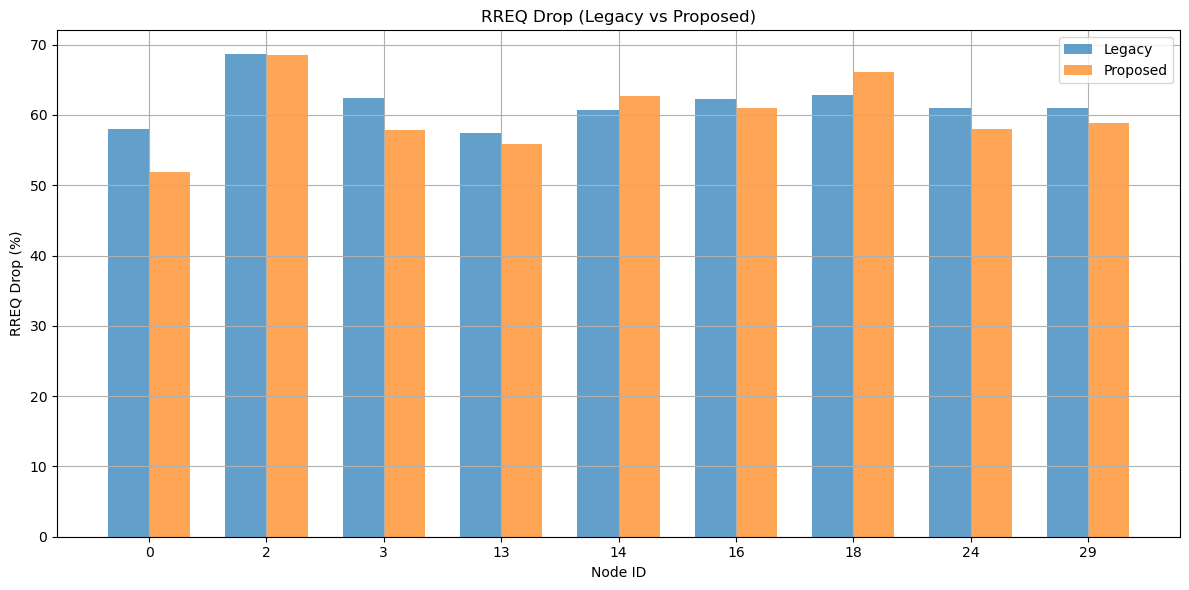

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 2, 3, 13, 14, 16, 18, 24, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N'

def compute_rreq_drop_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = base_path + str(node) + '/'
        rreq_file = node_path + 'rreqCount.txt'
        drop_file = node_path + 'sinr_drop_log.csv'

        rreq_total = 0
        rreq_drop = 0

        if os.path.isfile(rreq_file):
            with open(rreq_file, 'r') as f:
                rreq_total = len(f.readlines())

        if os.path.isfile(drop_file):
            df = pd.read_csv(drop_file, names=[
                'Time', 'SINR', 'Packet', 'TX_ID', 'RX_ID', 'X', 'Y', 'Z',
                'None', 'Nearby', 'Total'
            ])
            df.columns = df.columns.str.strip()
            rreq_drop = df['Packet'].str.contains('Rreq', case=False).sum()

        drop_ratio = (rreq_drop / rreq_total) * 100 if rreq_total > 0 else 0.0
        result[node] = drop_ratio

    return result

rreq_drop_proposed = compute_rreq_drop_ratio(base_path_proposed, h_node)
rreq_drop_legacy = compute_rreq_drop_ratio(base_path_legacy, h_node)

nodes = h_node
x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in nodes], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in nodes], width=bar_width, label='Proposed', alpha=0.7)
plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%)')
plt.title('RREQ Drop (Legacy vs Proposed)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


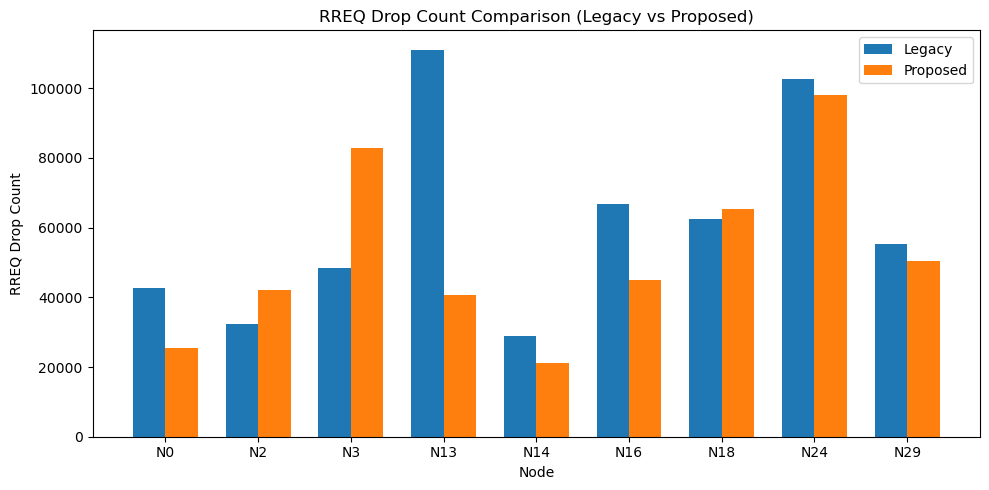

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

rreq_drops = {method: [] for method in methods}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path, low_memory=False)
            df.columns = df.columns.str.strip()
            filtered = df[(df["Packet"] == "aodv::Rreq") & (df["Success"] == False)]
            count = len(filtered)
        else:
            count = 0
        rreq_drops[method].append(count)

x = range(len(nodes))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar([i - width/2 for i in x], rreq_drops["L"], width=width, label='Legacy')
plt.bar([i + width/2 for i in x], rreq_drops["P"], width=width, label='Proposed')
plt.xticks(x, nodes)
plt.xlabel("Node")
plt.ylabel("RREQ Drop Count")
plt.title("RREQ Drop Count Comparison (Legacy vs Proposed)")
plt.legend()
plt.tight_layout()
plt.show()


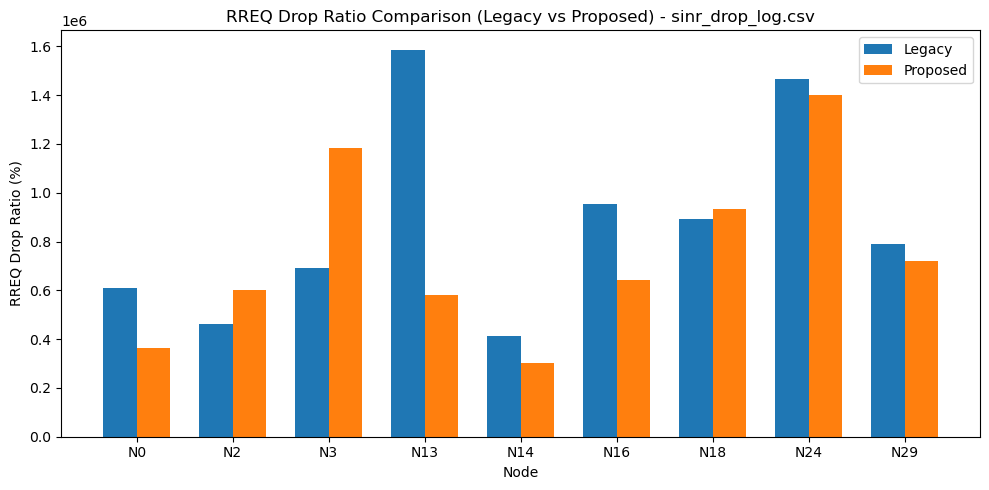

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]  # Legacy, Proposed

rreq_ratios = {method: [] for method in methods}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_drop_log.csv")
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path, low_memory=False)
            df.columns = df.columns.str.strip()
            rreq_df = df[df["Packet"] == "aodv::Rreq"]
            total = df["Total"].iloc[0] if not df.empty else 0
            drop_count = len(rreq_df)
            ratio = (drop_count / total * 100) if total > 0 else 0
        else:
            ratio = 0
        rreq_ratios[method].append(ratio)

x = range(len(nodes))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar([i - width/2 for i in x], rreq_ratios["L"], width=width, label='Legacy')
plt.bar([i + width/2 for i in x], rreq_ratios["P"], width=width, label='Proposed')
plt.xticks(x, nodes)
plt.xlabel("Node")
plt.ylabel("RREQ Drop Ratio (%)")
plt.title("RREQ Drop Ratio Comparison (Legacy vs Proposed) - sinr_drop_log.csv")
plt.legend()
plt.tight_layout()
plt.show()


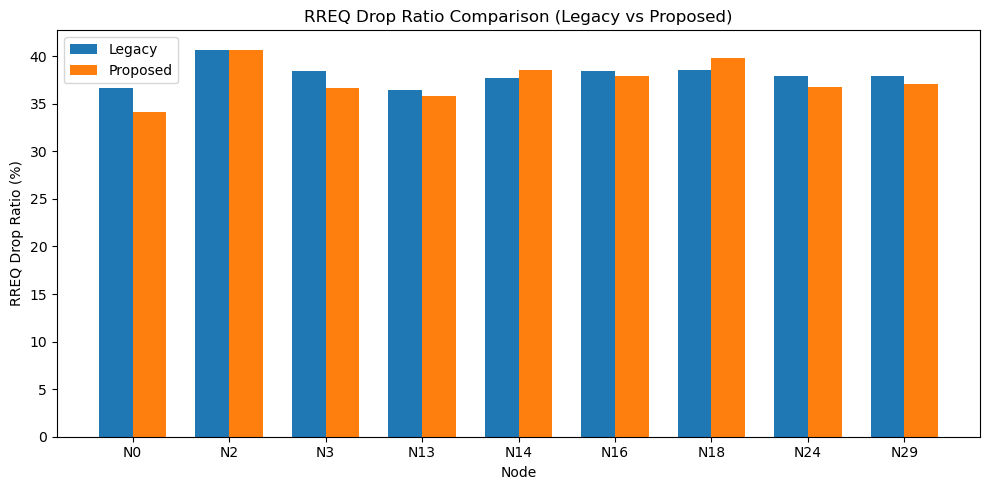

In [59]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 경로 설정
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]  # Legacy, Proposed

# 결과 저장
rreq_ratios = {method: [] for method in methods}

# 노드별 분석
for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path, low_memory=False)
            df.columns = df.columns.str.strip()  # 공백 제거
            rreq_all = df[df["Packet"] == "aodv::Rreq"]
            total = len(rreq_all)
            drops = len(rreq_all[rreq_all["Success"] == False])
            ratio = (drops / total * 100) if total > 0 else 0
        else:
            ratio = 0
        rreq_ratios[method].append(ratio)

# 그래프 출력
x = range(len(nodes))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar([i - width/2 for i in x], rreq_ratios["L"], width=width, label='Legacy')
plt.bar([i + width/2 for i in x], rreq_ratios["P"], width=width, label='Proposed')
plt.xticks(x, nodes)
plt.xlabel("Node")
plt.ylabel("RREQ Drop Ratio (%)")
plt.title("RREQ Drop Ratio Comparison (Legacy vs Proposed)")
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
import os
import pandas as pd

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

def extract_pdr_series(pdr_path):
    try:
        with open(pdr_path, 'r') as f:
            values = []
            for line in f:
                if ':' in line:
                    try:
                        _, val = line.strip().split(':')
                        values.append(float(val.strip()))
                    except:
                        continue
        return pd.Series(values) if values else None
    except:
        return None

result = []

for node in nodes:
    for method in methods:
        pdr_path = os.path.join(base_path, method, density, speed, node, "PDR.txt")
        series = extract_pdr_series(pdr_path)
        if series is not None and len(series) > 1:
            diff = series.diff()
            max_idx = diff.idxmax()
            max_increase = diff[max_idx]
            result.append({
                "Node": node,
                "Method": method,
                "Time": max_idx,
                "PDR Increase": max_increase
            })

df_result = pd.DataFrame(result)
print(df_result.sort_values(["Method", "Node"]))


   Node Method  Time  PDR Increase
0    N0      L     7      52.38097
6   N13      L     7      18.57140
8   N14      L     3      30.00000
10  N16      L     2     100.00000
12  N18      L     3      63.33330
2    N2      L     7      31.90470
14  N24      L     4      64.16670
16  N29      L     3      43.33330
4    N3      L    26      18.67690
1    N0      P    14      13.57140
7   N13      P     3      46.66670
9   N14      P     2     100.00000
11  N16      P    12      10.60600
13  N18      P     2     100.00000
3    N2      P    31      24.44090
15  N24      P     6      58.00000
17  N29      P     2      25.00000
5    N3      P    11      10.27270


{'N0': 130}
{'N0': 130, 'N2': 229}
{'N0': 130, 'N2': 229, 'N3': 276}
{'N0': 130, 'N2': 229, 'N3': 276, 'N13': 633}
{'N0': 130, 'N2': 229, 'N3': 276, 'N13': 633, 'N14': 105}
{'N0': 130, 'N2': 229, 'N3': 276, 'N13': 633, 'N14': 105, 'N16': 231}
{'N0': 130, 'N2': 229, 'N3': 276, 'N13': 633, 'N14': 105, 'N16': 231, 'N18': 182}
{'N0': 130, 'N2': 229, 'N3': 276, 'N13': 633, 'N14': 105, 'N16': 231, 'N18': 182, 'N24': 545}
{'N0': 130, 'N2': 229, 'N3': 276, 'N13': 633, 'N14': 105, 'N16': 231, 'N18': 182, 'N24': 545, 'N29': 303}
{'N0': 105}
{'N0': 105, 'N2': 202}
{'N0': 105, 'N2': 202, 'N3': 395}
{'N0': 105, 'N2': 202, 'N3': 395, 'N13': 229}
{'N0': 105, 'N2': 202, 'N3': 395, 'N13': 229, 'N14': 64}
{'N0': 105, 'N2': 202, 'N3': 395, 'N13': 229, 'N14': 64, 'N16': 141}
{'N0': 105, 'N2': 202, 'N3': 395, 'N13': 229, 'N14': 64, 'N16': 141, 'N18': 212}
{'N0': 105, 'N2': 202, 'N3': 395, 'N13': 229, 'N14': 64, 'N16': 141, 'N18': 212, 'N24': 780}
{'N0': 105, 'N2': 202, 'N3': 395, 'N13': 229, 'N14': 64, 'N1

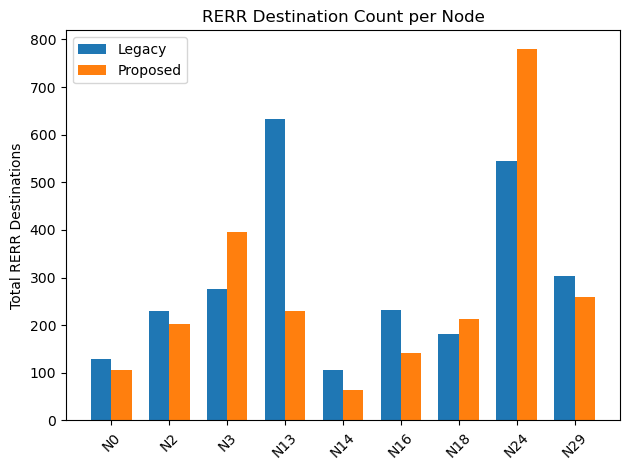

{'N0': 130, 'N2': 229, 'N3': 276, 'N13': 633, 'N14': 105, 'N16': 231, 'N18': 182, 'N24': 545, 'N29': 303}
{'N0': 105, 'N2': 202, 'N3': 395, 'N13': 229, 'N14': 64, 'N16': 141, 'N18': 212, 'N24': 780, 'N29': 260}


In [13]:
import os
import re
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"] 

def count_rerr_destinations(base_path, method, density, speed, nodes):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "rerr_precursor_log.txt")
        total = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    if "Precursor 수" in line:
                        m = re.search(r'Precursor 수:\s*(\d+)', line)
                        if m:
                            total += int(m.group(1))
        result[node] = total
        print(result)
    return result

legacy_result = count_rerr_destinations(base_path, "L", density, speed, nodes)
proposed_result = count_rerr_destinations(base_path, "P", density, speed, nodes)

x = range(len(nodes))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], [legacy_result[n] for n in nodes], width=width, label='Legacy')
ax.bar([i + width/2 for i in x], [proposed_result[n] for n in nodes], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels(nodes, rotation=45)
ax.set_ylabel('Total RERR Destinations')
ax.set_title('RERR Destination Count per Node')
ax.legend()
plt.tight_layout()
plt.show()

print(legacy_result)
print(proposed_result)


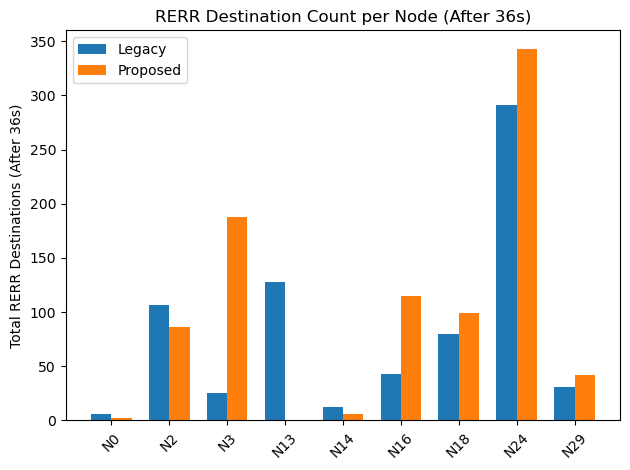

Legacy: {'N0': 6, 'N2': 107, 'N3': 25, 'N13': 128, 'N14': 12, 'N16': 43, 'N18': 80, 'N24': 291, 'N29': 31}
Proposed: {'N0': 2, 'N2': 86, 'N3': 188, 'N13': 0, 'N14': 6, 'N16': 115, 'N18': 99, 'N24': 343, 'N29': 42}


In [24]:
import os
import re
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

def count_rerr_destinations_after_time(base_path, method, density, speed, nodes, threshold=80.0):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "rerr_precursor_log.txt")
        total = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    try:
                        time_match = re.search(r'시간:\s*([\d.]+)', line)
                        precursor_match = re.search(r'Precursor 수:\s*(\d+)', line)
                        if time_match and precursor_match:
                            time = float(time_match.group(1))
                            if time >= threshold:
                                total += int(precursor_match.group(1))
                    except:
                        continue
        result[node] = total
    return result

legacy_result = count_rerr_destinations_after_time(base_path, "L", density, speed, nodes)
proposed_result = count_rerr_destinations_after_time(base_path, "P", density, speed, nodes)

x = range(len(nodes))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], [legacy_result[n] for n in nodes], width=width, label='Legacy')
ax.bar([i + width/2 for i in x], [proposed_result[n] for n in nodes], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels(nodes, rotation=45)
ax.set_ylabel('Total RERR Destinations (After 36s)')
ax.set_title('RERR Destination Count per Node (After 36s)')
ax.legend()
plt.tight_layout()
plt.show()

print("Legacy:", legacy_result)
print("Proposed:", proposed_result)


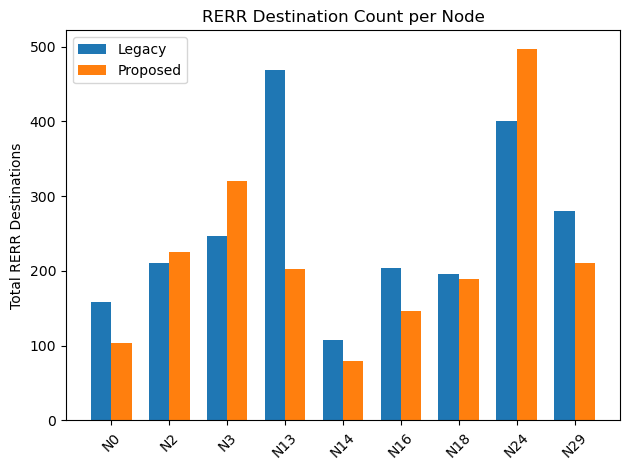

In [15]:
import os
import re
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"] 

def count_rerr_destinations(base_path, method, density, speed, nodes):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "rerr_debug.txt")
        total = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    if "목적지 수" in line:
                        m = re.search(r'목적지 수:\s*(\d+)', line)
                        if m:
                            total += int(m.group(1))
        result[node] = total
    return result

legacy_result = count_rerr_destinations(base_path, "L", density, speed, nodes)
proposed_result = count_rerr_destinations(base_path, "P", density, speed, nodes)

x = range(len(nodes))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], [legacy_result[n] for n in nodes], width=width, label='Legacy')
ax.bar([i + width/2 for i in x], [proposed_result[n] for n in nodes], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels(nodes, rotation=45)
ax.set_ylabel('Total RERR Destinations')
ax.set_title('RERR Destination Count per Node')
ax.legend()
plt.tight_layout()
plt.show()


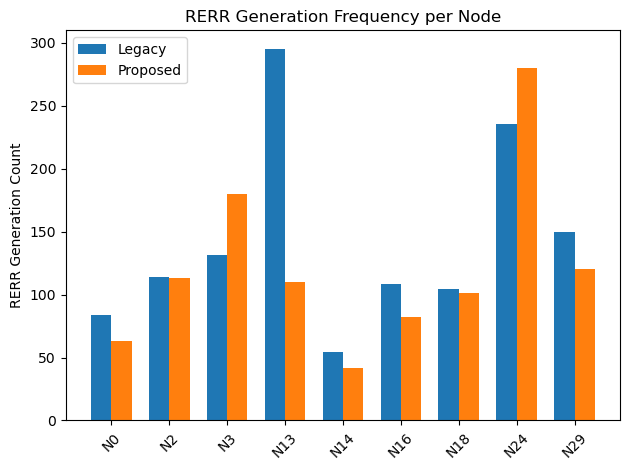

In [16]:
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

def count_rerr_frequency(base_path, method, density, speed, nodes):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "rerr_debug.txt")
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    if "[RERR 생성]" in line:
                        count += 1
        result[node] = count
    return result

legacy_result = count_rerr_frequency(base_path, "L", density, speed, nodes)
proposed_result = count_rerr_frequency(base_path, "P", density, speed, nodes)

x = range(len(nodes))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], [legacy_result[n] for n in nodes], width=width, label='Legacy')
ax.bar([i + width/2 for i in x], [proposed_result[n] for n in nodes], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels(nodes, rotation=45)
ax.set_ylabel('RERR Generation Count')
ax.set_title('RERR Generation Frequency per Node')
ax.legend()
plt.tight_layout()
plt.show()


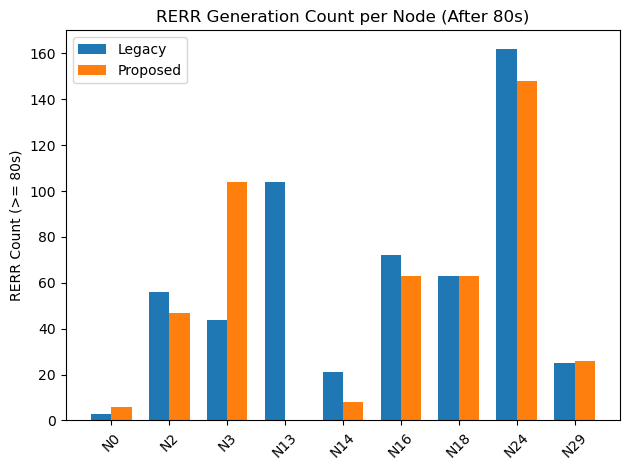

Legacy: {'N0': 3, 'N2': 56, 'N3': 44, 'N13': 104, 'N14': 21, 'N16': 72, 'N18': 63, 'N24': 162, 'N29': 25}
Proposed: {'N0': 6, 'N2': 47, 'N3': 104, 'N13': 0, 'N14': 8, 'N16': 63, 'N18': 63, 'N24': 148, 'N29': 26}


In [34]:
import os
import matplotlib.pyplot as plt
import re

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

def count_rerr_after_threshold(base_path, method, density, speed, nodes, threshold=70.0):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "rerr_debug.txt")
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    if "[RERR 생성]" in line:
                        match = re.search(r'시간:\s*([\d.]+)', line)
                        if match:
                            time = float(match.group(1))
                            if time >= threshold:
                                count += 1
        result[node] = count
    return result

legacy_result = count_rerr_after_threshold(base_path, "L", density, speed, nodes)
proposed_result = count_rerr_after_threshold(base_path, "P", density, speed, nodes)

x = range(len(nodes))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], [legacy_result[n] for n in nodes], width=width, label='Legacy')
ax.bar([i + width/2 for i in x], [proposed_result[n] for n in nodes], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels(nodes, rotation=45)
ax.set_ylabel('RERR Count (>= 80s)')
ax.set_title('RERR Generation Count per Node (After 80s)')
ax.legend()
plt.tight_layout()
plt.show()

print("Legacy:", legacy_result)
print("Proposed:", proposed_result)


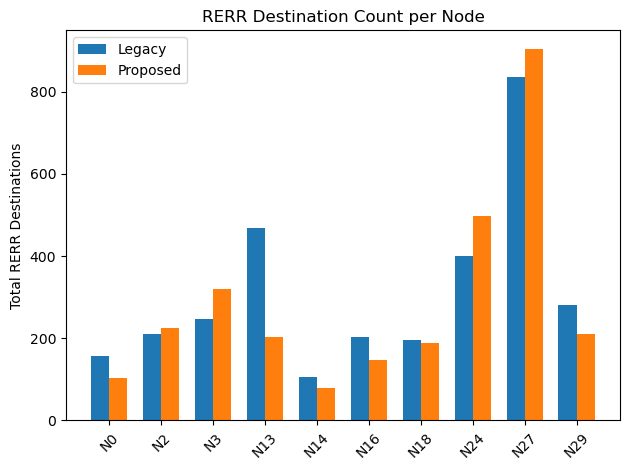

In [33]:
import os
import re
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N27", "N29"]
methods = ["L", "P"] 

def count_rerr_destinations(base_path, method, density, speed, nodes):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "rerr_debug.txt")
        total = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    if "목적지 수" in line:
                        m = re.search(r'목적지 수:\s*(\d+)', line)
                        if m:
                            total += int(m.group(1))
        result[node] = total
    return result

legacy_result = count_rerr_destinations(base_path, "L", density, speed, nodes)
proposed_result = count_rerr_destinations(base_path, "P", density, speed, nodes)

x = range(len(nodes))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], [legacy_result[n] for n in nodes], width=width, label='Legacy')
ax.bar([i + width/2 for i in x], [proposed_result[n] for n in nodes], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels(nodes, rotation=45)
ax.set_ylabel('Total RERR Destinations')
ax.set_title('RERR Destination Count per Node')
ax.legend()
plt.tight_layout()
plt.show()


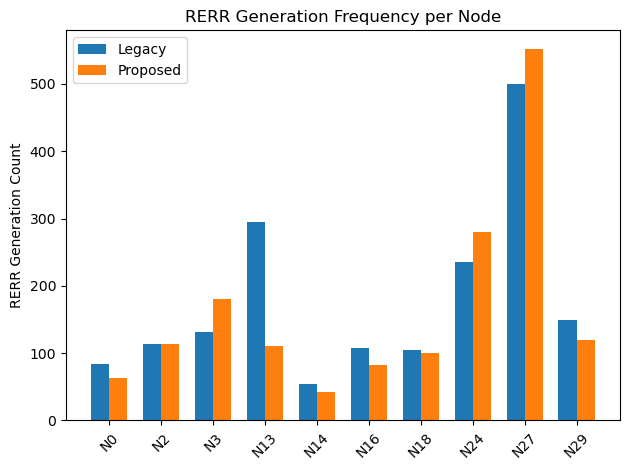

In [5]:
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N27", "N29"]
methods = ["L", "P"]

def count_rerr_frequency(base_path, method, density, speed, nodes):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "rerr_debug.txt")
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r', encoding='utf-8') as f:
                for line in f:
                    if "[RERR 생성]" in line:
                        count += 1
        result[node] = count
    return result

legacy_result = count_rerr_frequency(base_path, "L", density, speed, nodes)
proposed_result = count_rerr_frequency(base_path, "P", density, speed, nodes)

x = range(len(nodes))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width/2 for i in x], [legacy_result[n] for n in nodes], width=width, label='Legacy')
ax.bar([i + width/2 for i in x], [proposed_result[n] for n in nodes], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels(nodes, rotation=45)
ax.set_ylabel('RERR Generation Count')
ax.set_title('RERR Generation Frequency per Node')
ax.legend()
plt.tight_layout()
plt.show()


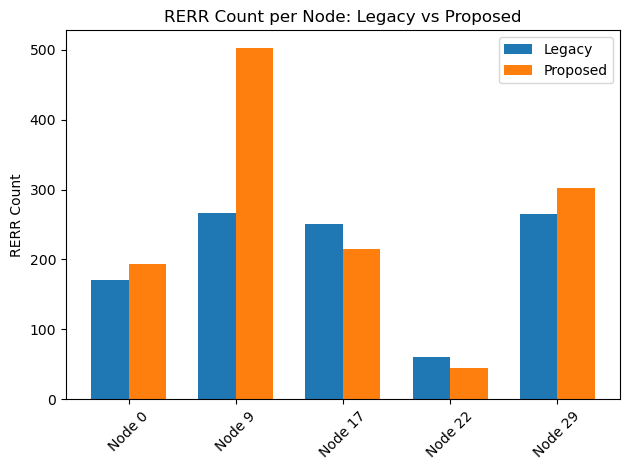

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 9, 17, 22, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/P/D400/S20/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_04_25_AppSci_AODV_V02/L/D400/S20/N'

def compute_rerr_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = os.path.join(base_path + str(node))
        rerr_file = os.path.join(node_path, 'rerr.txt')

        rerr_total = 0
        if os.path.isfile(rerr_file):
            with open(rerr_file, 'r') as f:
                rerr_total = len(f.readlines())
        result[node] = rerr_total
    return result

legacy_rerr = compute_rerr_ratio(base_path_legacy, h_node)
proposed_rerr = compute_rerr_ratio(base_path_proposed, h_node)

x = range(len(h_node))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width / 2 for i in x], [legacy_rerr[n] for n in h_node], width=width, label='Legacy')
ax.bar([i + width / 2 for i in x], [proposed_rerr[n] for n in h_node], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels([f'Node {n}' for n in h_node])
ax.set_ylabel('RERR Count')
ax.set_title('RERR Count per Node: Legacy vs Proposed')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4204138812.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4204138812.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4204138812.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4204138812.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

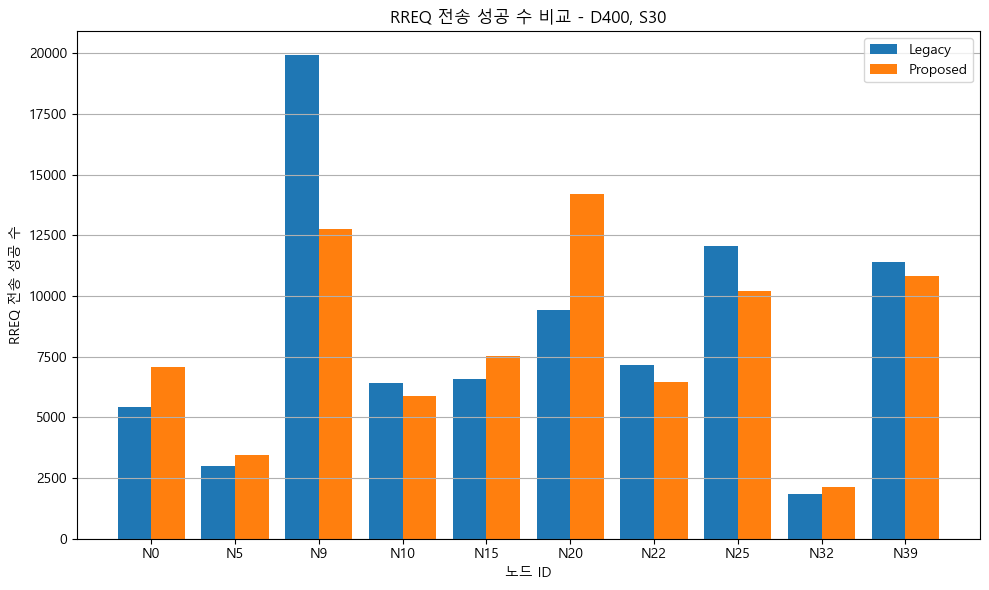

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rreq_success = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rreq_success[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['group'] = (df['sender'] != df['sender'].shift()).cumsum()

        group_success = df.groupby('group')['Success'].apply(lambda x: (x == 'True').any())
        success_count = group_success.sum()
        results_rreq_success[method].append(success_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rreq_success['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rreq_success['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 성공 수")
plt.xlabel("노드 ID")
plt.title(f"RREQ 전송 성공 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


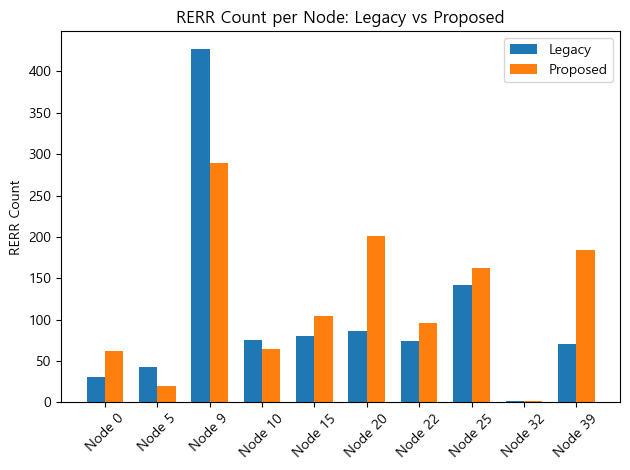

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt

h_node = [0, 5, 9, 10, 15, 20, 22, 25, 32, 39]
base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01/P/D400/S30/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01/L/D400/S30/N'

def compute_rerr_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = os.path.join(base_path + str(node))
        rerr_file = os.path.join(node_path, 'rerr.txt')

        rerr_total = 0
        if os.path.isfile(rerr_file):
            with open(rerr_file, 'r') as f:
                rerr_total = len(f.readlines())
        result[node] = rerr_total
    return result

legacy_rerr = compute_rerr_ratio(base_path_legacy, h_node)
proposed_rerr = compute_rerr_ratio(base_path_proposed, h_node)

x = range(len(h_node))
width = 0.35

fig, ax = plt.subplots()
ax.bar([i - width / 2 for i in x], [legacy_rerr[n] for n in h_node], width=width, label='Legacy')
ax.bar([i + width / 2 for i in x], [proposed_rerr[n] for n in h_node], width=width, label='Proposed')

ax.set_xticks(x)
ax.set_xticklabels([f'Node {n}' for n in h_node])
ax.set_ylabel('RERR Count')
ax.set_title('RERR Count per Node: Legacy vs Proposed')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\1817581454.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\1817581454.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\1817581454.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\1817581454.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

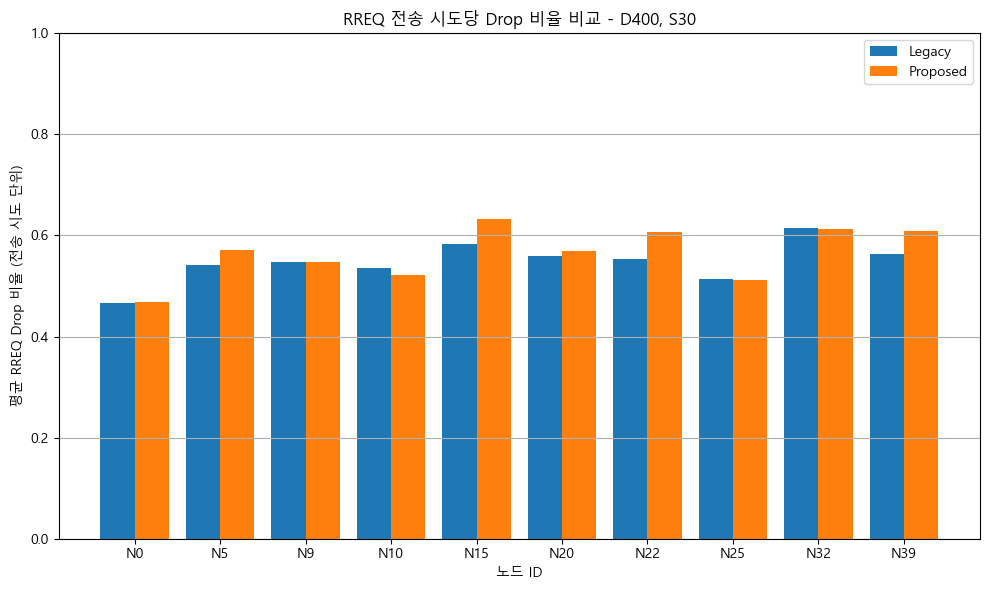

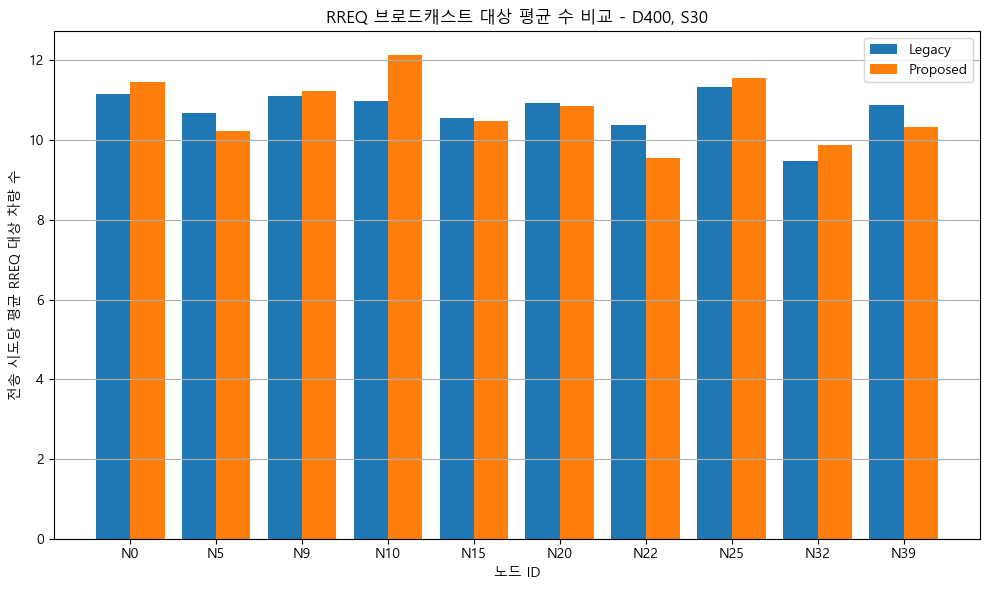

In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_drop_rate = {'L': [], 'P': []}
results_avg_receivers = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_drop_rate[method].append(0)
            results_avg_receivers[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
        df['Success'] = df['Success'].astype(str)

        df['group'] = (df['sender'] != df['sender'].shift()).cumsum()

        group_drop_rate = df.groupby('group').apply(
            lambda g: (g['Success'] == 'False').sum() / len(g) if len(g) > 0 else 0
        )
        avg_drop_rate = group_drop_rate.mean() if not group_drop_rate.empty else 0
        results_drop_rate[method].append(avg_drop_rate)

        group_receivers = df.groupby('group')['receiver'].agg(lambda x: len(set(x)))
        avg_receivers = group_receivers.mean() if not group_receivers.empty else 0
        results_avg_receivers[method].append(avg_receivers)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_drop_rate['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_drop_rate['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("평균 RREQ Drop 비율 (전송 시도 단위)")
plt.xlabel("노드 ID")
plt.title(f"RREQ 전송 시도당 Drop 비율 비교 - {density}, {speed}")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_avg_receivers['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_avg_receivers['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("전송 시도당 평균 RREQ 대상 차량 수")
plt.xlabel("노드 ID")
plt.title(f"RREQ 브로드캐스트 대상 평균 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\3281042755.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\3281042755.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\3281042755.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\3281042755.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

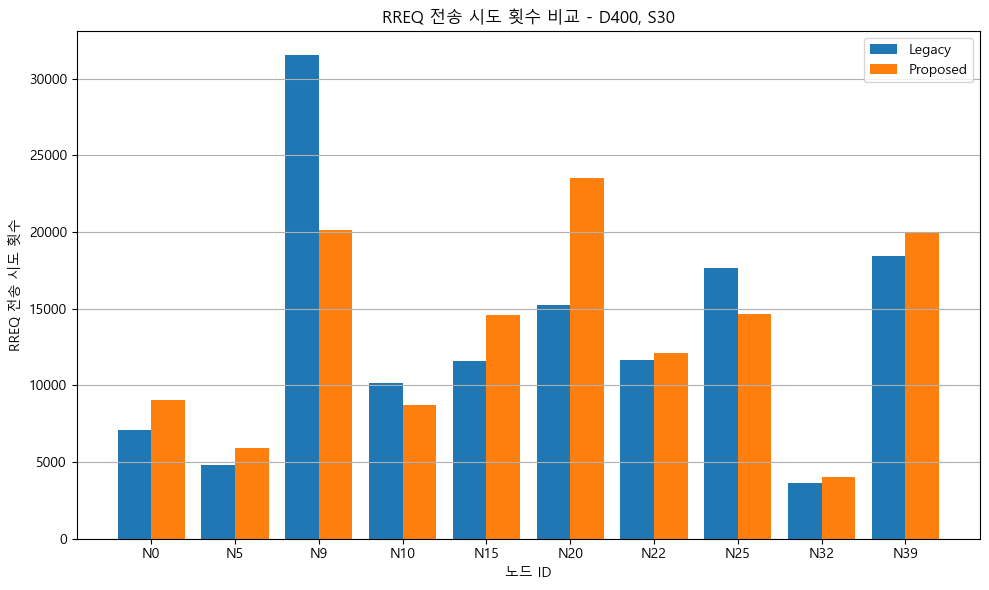

In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rreq_attempts = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rreq_attempts[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()

        df['group'] = (df['sender'] != df['sender'].shift()).cumsum()
        rreq_attempt_count = df['group'].nunique()
        results_rreq_attempts[method].append(rreq_attempt_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rreq_attempts['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rreq_attempts['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 시도 횟수")
plt.xlabel("노드 ID")
plt.title(f"RREQ 전송 시도 횟수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4204138812.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4204138812.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4204138812.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4204138812.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

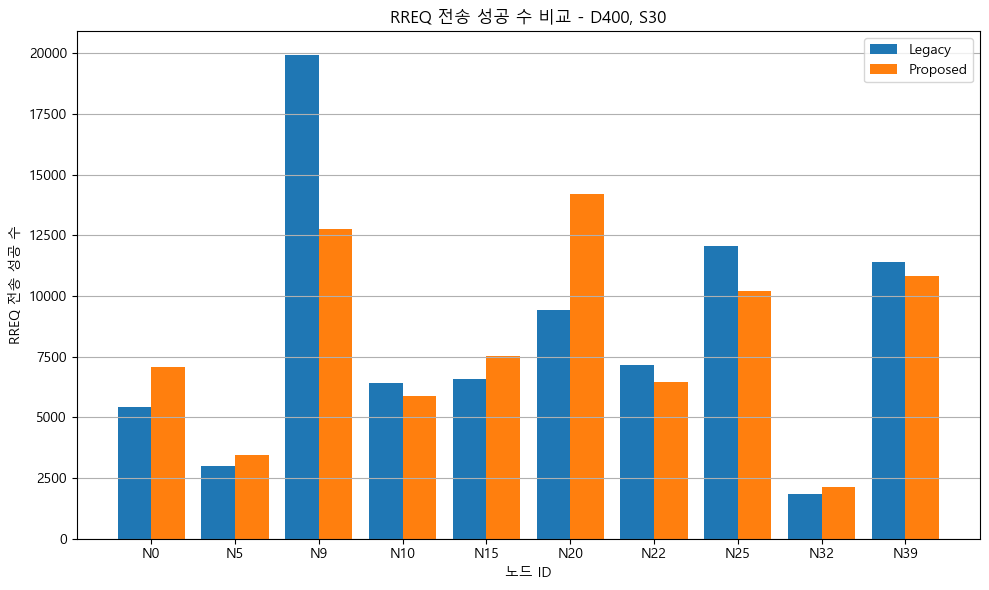

In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rreq_success = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rreq_success[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['group'] = (df['sender'] != df['sender'].shift()).cumsum()

        group_success = df.groupby('group')['Success'].apply(lambda x: (x == 'True').any())
        success_count = group_success.sum()
        results_rreq_success[method].append(success_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rreq_success['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rreq_success['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 성공 수")
plt.xlabel("노드 ID")
plt.title(f"RREQ 전송 성공 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4132982777.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4132982777.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4132982777.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_2188\4132982777.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

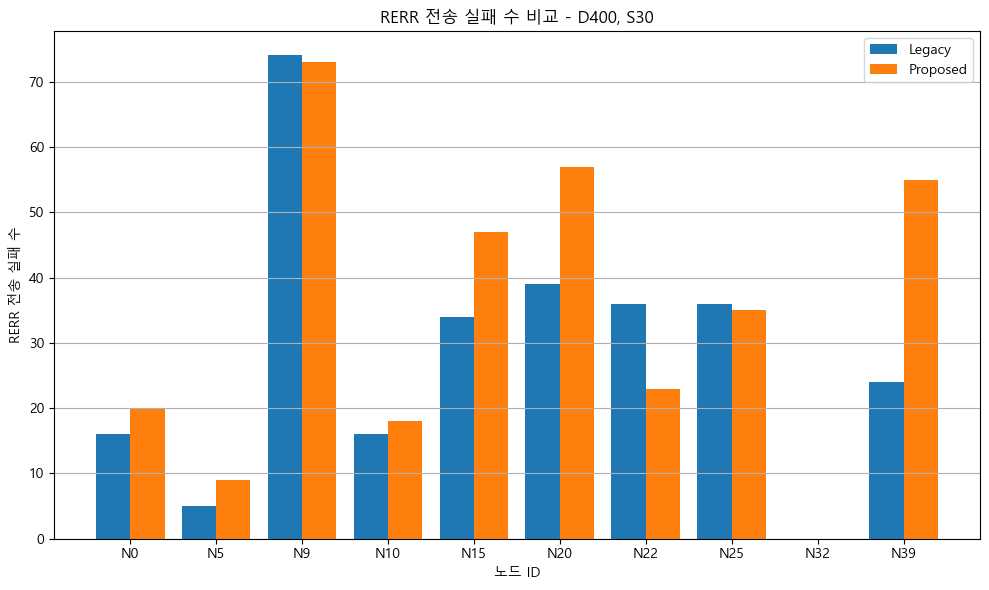

In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rerr_fail = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rerr_fail[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("arpREPLY", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'].astype(str) + "_" + df['sender'].astype(str)

        grouped = df.groupby('group')
        fail_flags = grouped['Success'].apply(lambda x: (x == 'True').sum() == 0)
        fail_count = fail_flags.sum()

        results_rerr_fail[method].append(fail_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rerr_fail['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rerr_fail['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RERR 전송 실패 수")
plt.xlabel("노드 ID")
plt.title(f"RERR 전송 실패 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


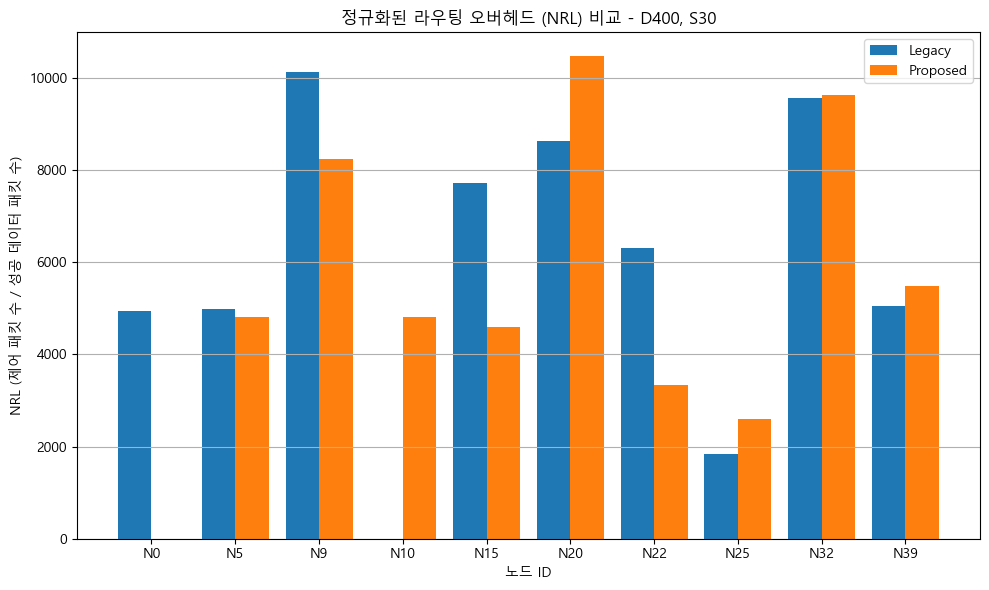

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
methods = ["L", "P"]
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            print(f"[{method}/{node}] 파일 없음")
            results[method].append(float('inf'))
            continue

        df = pd.read_csv(file_path, header=0)
        df.columns = df.columns.str.strip()

        if 'Packet' not in df.columns or 'Success' not in df.columns:
            print(f"[{method}/{node}] 누락된 컬럼: {df.columns.tolist()}")
            results[method].append(float('inf'))
            continue

        df['Packet'] = df['Packet'].astype(str)
        df['Success'] = df['Success'].astype(str).str.lower() == 'true'

        ctrl_count = df['Packet'].str.contains("aodv::Rreq|aodv::Rrep|aodv::Rerr", na=False).sum()

        data_success_count = df[(df['Packet'].str.contains("ping0-reply", na=False)) & (df['Success'])].shape[0]

        nrl = ctrl_count / data_success_count if data_success_count > 0 else float('inf')
        results[method].append(nrl)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("NRL (제어 패킷 수 / 성공 데이터 패킷 수)")
plt.xlabel("노드 ID")
plt.title(f"정규화된 라우팅 오버헤드 (NRL) 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


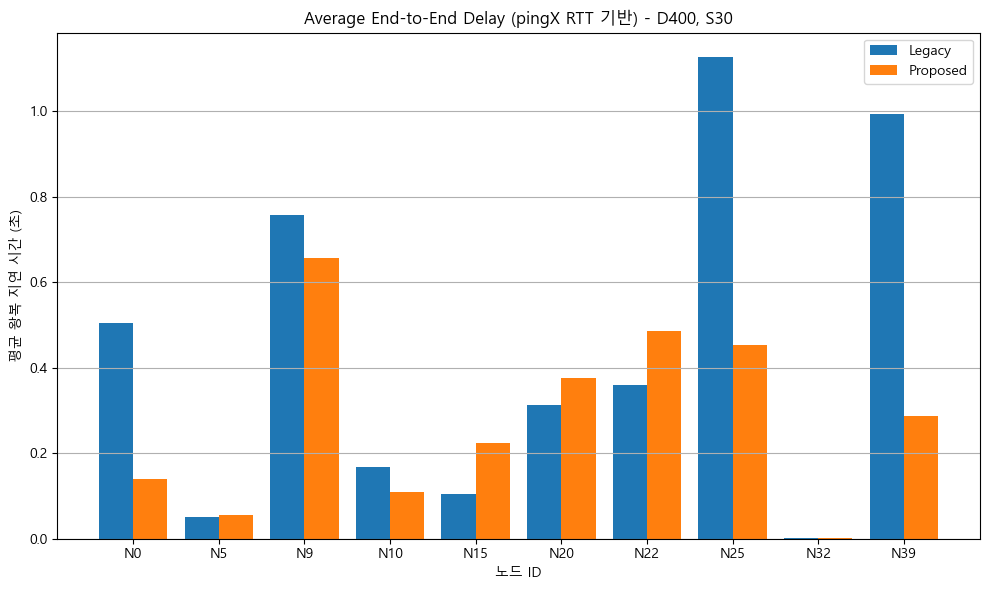

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
methods = ["L", "P"]
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path, header=0)
        df.columns = df.columns.str.strip()

        if 'Packet' not in df.columns or 'Sender' not in df.columns or 'Receiver' not in df.columns or 'Time' not in df.columns or 'Success' not in df.columns:
            results[method].append(0)
            continue

        df['Packet'] = df['Packet'].astype(str)
        df['Success'] = df['Success'].astype(str).str.lower() == 'true'
        df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
        df = df.dropna(subset=['Time'])

        ping_tx = df[df['Packet'].str.match(r'ping\d+$')]
        ping_rx = df[df['Packet'].str.match(r'ping\d+-reply$') & df['Success']]

        ping_tx = ping_tx.copy()
        ping_rx = ping_rx.copy()
        ping_tx['PktName'] = ping_tx['Packet']
        ping_rx['PktName'] = ping_rx['Packet'].str.replace("-reply", "", regex=False)

        tx_dict = ping_tx.set_index('PktName')['Time'].to_dict()
        rx_dict = ping_rx.set_index('PktName')['Time'].to_dict()

        delays = []
        for pkt in set(tx_dict.keys()) & set(rx_dict.keys()):
            delays.append(rx_dict[pkt] - tx_dict[pkt])

        avg_delay = sum(delays) / len(delays) if delays else 0
        results[method].append(avg_delay)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("평균 왕복 지연 시간 (초)")
plt.xlabel("노드 ID")
plt.title(f"Average End-to-End Delay (pingX RTT 기반) - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


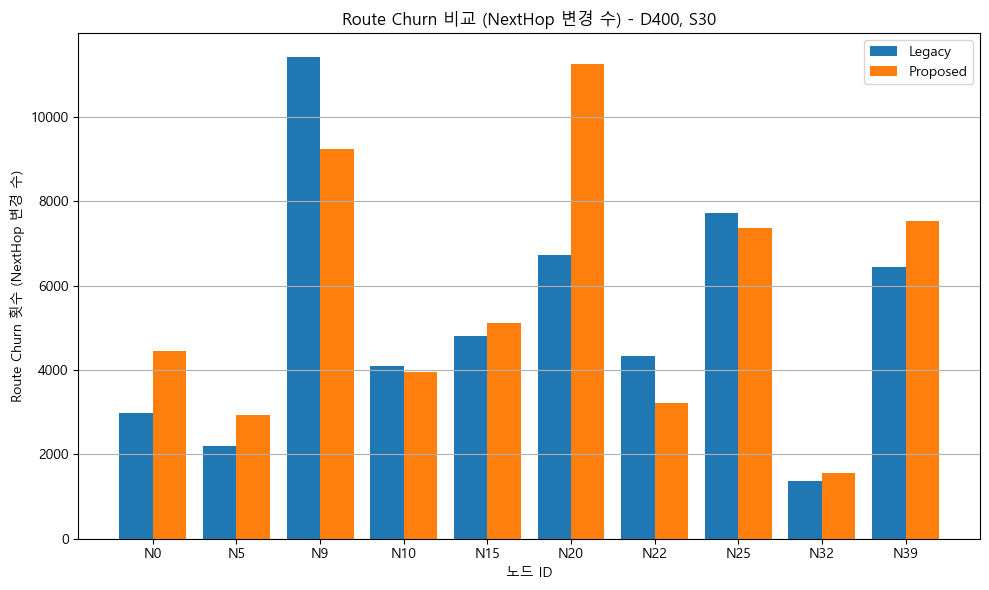

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
methods = ["L", "P"]
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()
        df['Previous_NextHop'] = df['Previous_NextHop'].astype(str)
        df['New_NextHop'] = df['New_NextHop'].astype(str)

        churn_count = (df['Previous_NextHop'] != df['New_NextHop']).sum()
        results[method].append(churn_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("Route Churn 횟수 (NextHop 변경 수)")
plt.xlabel("노드 ID")
plt.title(f"Route Churn 비교 (NextHop 변경 수) - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


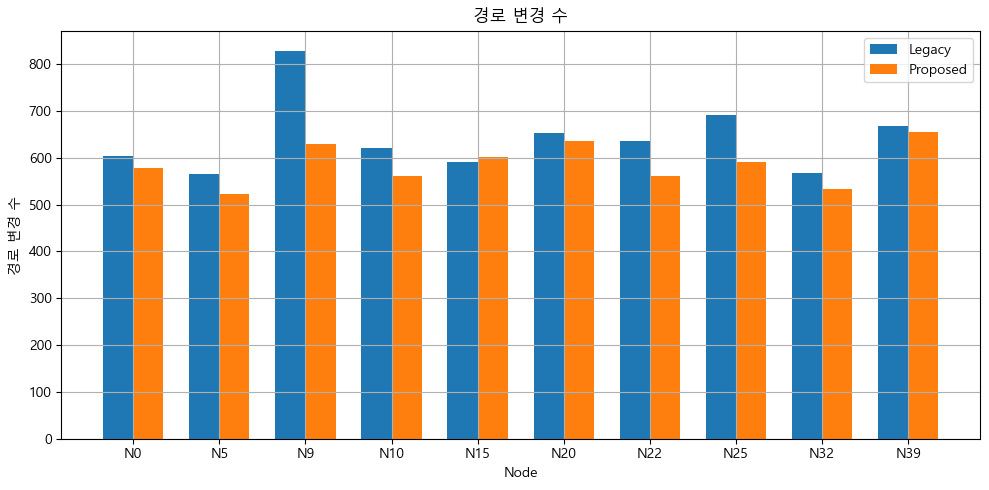

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]

def compute_true_route_changes_per_dest(mode):
    avg_changes = {}

    for node in nodes:
        path = os.path.join(base_path, mode, density, speed, node, "aodv_routing_log.csv")
        if not os.path.isfile(path):
            avg_changes[node] = 0
            continue

        try:
            df = pd.read_csv(path)
            required_cols = [
                "Destination", "New_HopCount", "New_NextHop", "New_LifeTime"
            ]
            if not set(required_cols).issubset(df.columns):
                avg_changes[node] = 0
                continue

            df = df.sort_values(by=["Destination", "Time"])
            change_counts = {}
            prev_values = {}

            for _, row in df.iterrows():
                dest = row["Destination"]
                current = (
                    row["New_HopCount"],
                    row["New_NextHop"],
                    row["New_LifeTime"]
                )

                if dest not in prev_values:
                    prev_values[dest] = current
                    change_counts[dest] = 0
                    continue

                if current != prev_values[dest]:
                    change_counts[dest] += 1
                    prev_values[dest] = current

            avg = sum(change_counts.values()) / len(change_counts) if change_counts else 0
            avg_changes[node] = avg

        except:
            avg_changes[node] = 0

    return avg_changes

legacy_avg = compute_true_route_changes_per_dest("L")
proposed_avg = compute_true_route_changes_per_dest("P")

x = range(len(nodes))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar([i - width/2 for i in x], [legacy_avg[n] for n in nodes], width=width, label='Legacy')
plt.bar([i + width/2 for i in x], [proposed_avg[n] for n in nodes], width=width, label='Proposed')

plt.xticks(x, nodes)
plt.xlabel("Node")
plt.ylabel("경로 변경 수")
plt.title("경로 변경 수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


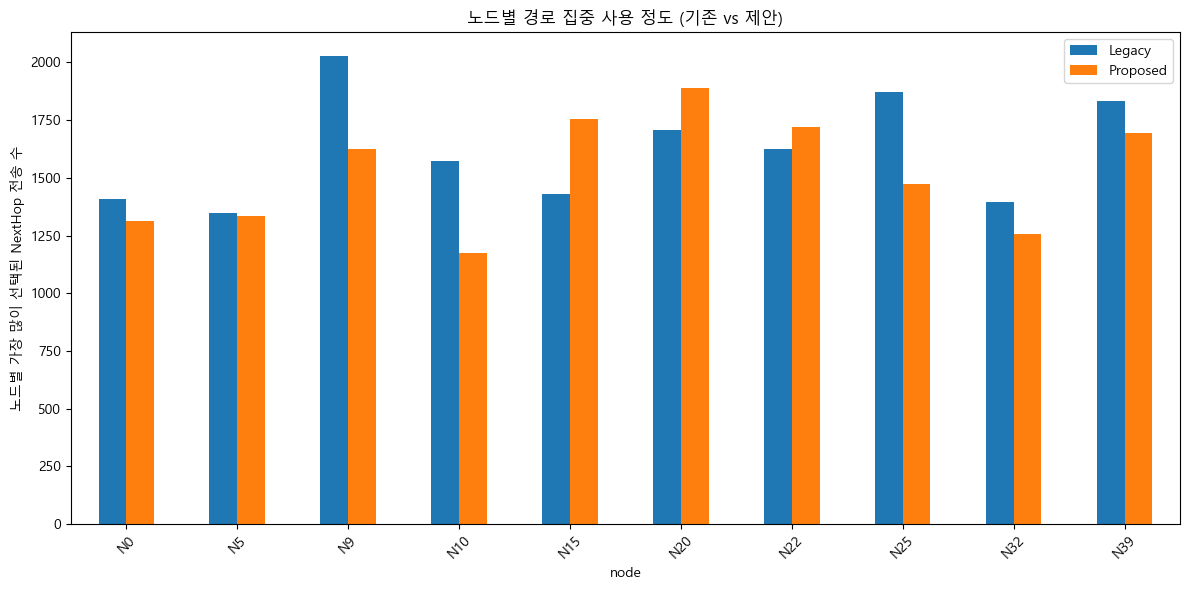

In [31]:
import os
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_04_AppSci_AODV_V01"
density = "D400"
speed = "S30"
nodes = ["N0", "N5", "N9", "N10", "N15", "N20", "N22", "N25", "N32", "N39"]
methods = ['L', 'P']

centralization_counts = {'node': [], 'Legacy': [], 'Proposed': []}

for node in nodes:
    counts = {}
    for method in methods:
        file_path = os.path.join(base_path, method, density, speed, node, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            counts[method] = 0
            continue
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()
        if 'New_NextHop' not in df.columns:
            counts[method] = 0
            continue

        nexthops = df['New_NextHop'].dropna().astype(str).tolist()
        if not nexthops:
            counts[method] = 0
            continue

        counter = Counter(nexthops)
        most_common_count = counter.most_common(1)[0][1]
        counts[method] = most_common_count

    centralization_counts['node'].append(node)
    centralization_counts['Legacy'].append(counts.get('L', 0))
    centralization_counts['Proposed'].append(counts.get('P', 0))

df_plot = pd.DataFrame(centralization_counts).set_index('node')
df_plot.plot(kind='bar', figsize=(12, 6))
plt.ylabel("노드별 가장 많이 선택된 NextHop 전송 수")
plt.title("노드별 경로 집중 사용 정도 (기존 vs 제안)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
